# Importation des packages necessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# chargement des données

In [2]:
data = pd.read_csv('data/billionaires.csv')
data.head()

,year,rank,name,net_worth,age,natinality,source_wealth
0,2019,1,Jeff Bezos,131,55,United States,Amazon
1,2019,2,Bill Gates,96.5,63,United States,Microsoft
2,2019,3,Warren Buffett,82.5,88,United States,Berkshire Hathaway
3,2019,4,Bernard Arnault,76,70,France,LVMH
4,2019,5,Carlos Slim,64,79,Mexico,"América Móvil, Grupo Carso"


Il ya des noms qui contiennent des '*'

In [3]:
data[165:171]

,year,rank,name,net_worth,age,natinality,source_wealth
165,2003,6,Jim Walton*,20.8,54,United States,Wal-Mart
166,2003,7,John Walton*,20.7,56,United States,Wal-Mart
167,2003,8,Alice Walton*,20.5,53,United States,Wal-Mart
168,2003,8,S. Robson Walton*,20.5,58,United States,Wal-Mart
169,2003,8,Helen Walton*,20.5,82,United States,Wal-Mart
170,2002,1,Bill Gates,60.0,44,United States,Microsoft


# supprimer les '*' à la fin des noms

In [4]:
cleaned_names = data['name'].apply(lambda elem: elem if elem.endswith('*') == False else elem[:-1])
cleaned_names.tail(23)

157                Jim Walton
158               John Walton
159          S. Robson Walton
160                Bill Gates
161            Warren Buffett
162    Karl and Theo Albrecht
163                Paul Allen
164             Larry Ellison
165                Jim Walton
166               John Walton
167              Alice Walton
168          S. Robson Walton
169              Helen Walton
170                Bill Gates
171             Larry Ellison
172                Paul Allen
173            Warren Buffett
174    Karl and Theo Albrecht
175       Al-Waleed bin Talal
176          S. Robson Walton
177             Masayoshi Son
178              Michael Dell
179           Kenneth Thomson
Name: name, dtype: object

In [5]:
data['name'] = cleaned_names
data[165:171]

,year,rank,name,net_worth,age,natinality,source_wealth
165,2003,6,Jim Walton,20.8,54,United States,Wal-Mart
166,2003,7,John Walton,20.7,56,United States,Wal-Mart
167,2003,8,Alice Walton,20.5,53,United States,Wal-Mart
168,2003,8,S. Robson Walton,20.5,58,United States,Wal-Mart
169,2003,8,Helen Walton,20.5,82,United States,Wal-Mart
170,2002,1,Bill Gates,60.0,44,United States,Microsoft


# Convertir la colonne net worth en float (actuellement elle est en str)

In [6]:
data['net_worth'] = np.array(data['net_worth'], dtype=np.dtype(float))

In [7]:
_first = data.loc[np.array(data['rank'] == 1), ['year', 'net_worth']]
_second = data.loc[np.array(data['rank'] == 2), ['year', 'net_worth']]
_third = data.loc[np.array(data['rank'] == 3), ['year', 'net_worth']]
_first.head()

,year,net_worth
0,2019,131.0
10,2018,112.0
20,2017,86.0
30,2016,75.0
40,2015,79.2


In [8]:
_second.head()

,year,net_worth
1,2019,96.5
11,2018,90.0
21,2017,75.6
31,2016,67.0
41,2015,77.1


In [9]:
df = pd.merge(left=pd.merge(left=_first, right=_second, on='year'), right=_third, on='year')
df.head()

,year,net_worth_x,net_worth_y,net_worth
0,2019,131.0,96.5,82.5
1,2018,112.0,90.0,84.0
2,2017,86.0,75.6,72.8
3,2016,75.0,67.0,60.8
4,2015,79.2,77.1,72.7


## Renomer les colonnes

In [10]:
df.rename(columns={'net_worth_x': 'first', 'net_worth_y': 'second', 'net_worth': 'third'}, inplace=True)
df.head()

,year,first,second,third
0,2019,131.0,96.5,82.5
1,2018,112.0,90.0,84.0
2,2017,86.0,75.6,72.8
3,2016,75.0,67.0,60.8
4,2015,79.2,77.1,72.7


# Renverser le dataframe (faire un reverse)

In [11]:
df0 = df.loc[(df.shape[0] - 1):-1:-1 ]
df0.head()

,year,first,second,third
17,2002,60.0,47.0,28.0
16,2003,52.8,35.0,26.8
15,2004,46.6,42.9,23.0
14,2005,46.5,44.0,25.0
13,2006,52.0,42.0,30.0


## Ajuster les indexes pour qu'ils soient conformes aux numeros d'ordre

In [12]:
df0.index = np.arange(df0.shape[0])
df0.head()

,year,first,second,third
0,2002,60.0,47.0,28.0
1,2003,52.8,35.0,26.8
2,2004,46.6,42.9,23.0
3,2005,46.5,44.0,25.0
4,2006,52.0,42.0,30.0


# dessiner les graphes des trois premiers


Text(0.5, 0.98, 'Diagramme de variation pour les 3 premiers')

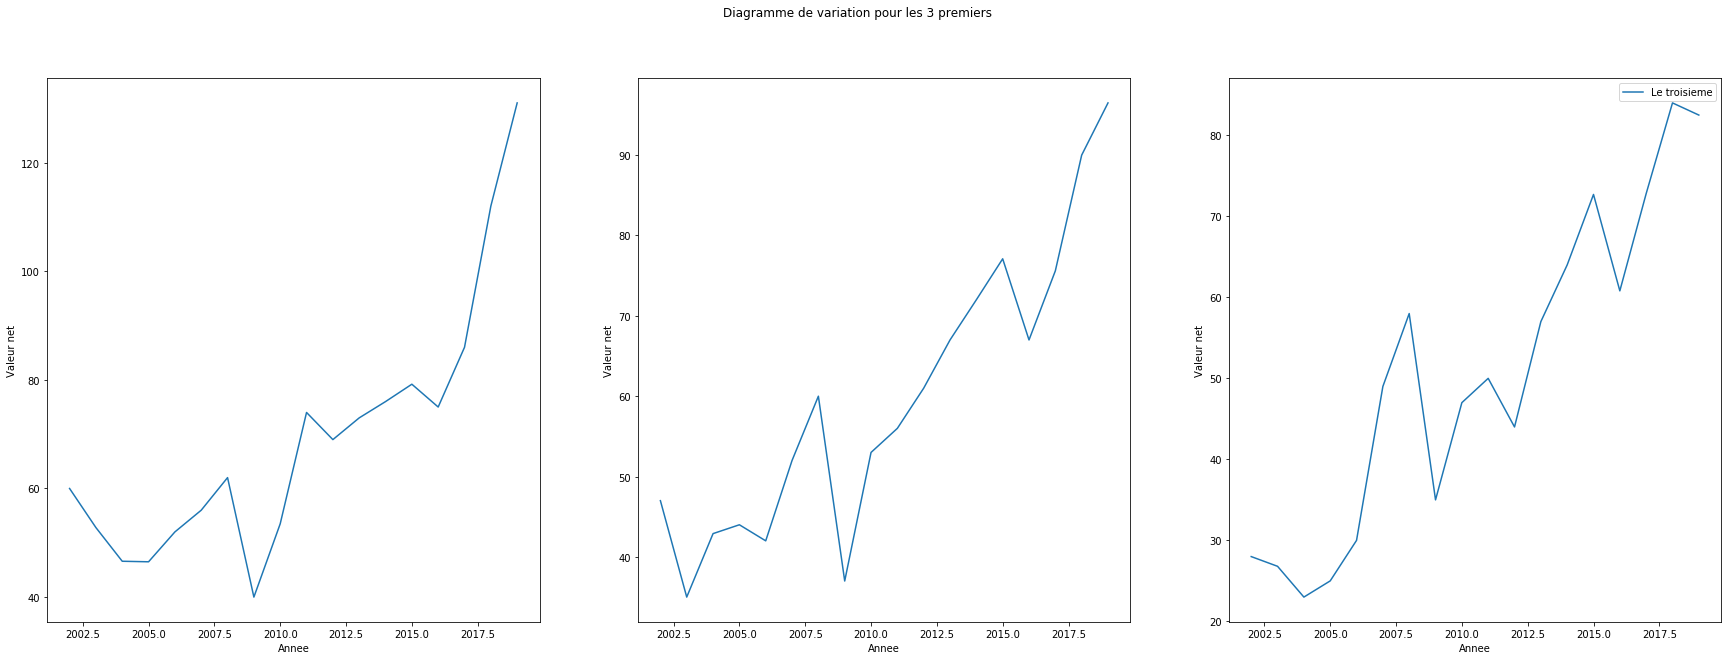

In [13]:
plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.ylabel('Valeur net')
plt.xlabel('Annee')


plt.plot(df0['year'], df0['first'], label='Le premier')
plt.subplot(132)
plt.ylabel('Valeur net')
plt.xlabel('Annee')

plt.plot(df0['year'], df0['second'], label='Le deuxieme')
plt.subplot(133)
plt.plot(df0['year'], df0['third'], label='Le troisieme')
plt.ylabel('Valeur net')
plt.xlabel('Annee')
plt.legend()
plt.suptitle("Diagramme de variation pour les 3 premiers")

In [14]:
df0.tail(7)

,year,first,second,third
11,2013,73.0,67.0,57.0
12,2014,76.0,72.0,64.0
13,2015,79.2,77.1,72.7
14,2016,75.0,67.0,60.8
15,2017,86.0,75.6,72.8
16,2018,112.0,90.0,84.0
17,2019,131.0,96.5,82.5


In [15]:
names = data['name'].unique()                                                                                                                                                                                           
names

array(['Jeff Bezos', 'Bill Gates', 'Warren Buffett', 'Bernard Arnault',
       'Carlos Slim', 'Amancio Ortega', 'Larry Ellison',
       'Mark Zuckerberg', 'Michael Bloomberg', 'Larry Page',
       'Charles Koch', 'David Koch', 'Christy Walton', 'Jim Walton',
       'Liliane Bettencourt', 'Carlos Slim & family', 'Sheldon Adelson',
       'Christy Walton & family', 'Li Ka-shing',
       'Liliane Bettencourt & family', 'Eike Batista', 'Stefan Persson',
       'Karl Albrecht', 'Lakshmi Mittal', 'Mukesh Ambani',
       'Ingvar Kamprad', 'Theo Albrecht', 'Warren  Buffett',
       'Anil Ambani', 'Kushal Pal Singh', 'Oleg Deripaska',
       'Karl   Albrecht', 'David Thomson', 'Paul Allen',
       'Al-Waleed bin Talal', 'Kenneth Thomson', 'S. Robson Walton',
       'Alice Walton', 'Helen Walton', 'John Walton',
       'Karl and Theo Albrecht', 'Masayoshi Son', 'Michael Dell'],
      dtype=object)

In [16]:
len(names)

43

## les plus frequents de la liste

In [17]:
freq = data.groupby(['name']).count().sort_values(ascending = False, by='year')['year']
freq.head(7)

name
Bill Gates         18
Warren Buffett     17
Larry Ellison      14
Amancio Ortega     12
Carlos Slim        10
Bernard Arnault     8
Lakshmi Mittal      7
Name: year, dtype: int64

In [18]:
bill = data[data['name'] == 'Bill Gates']
bill.head()

,year,rank,name,net_worth,age,natinality,source_wealth
1,2019,2,Bill Gates,96.5,63,United States,Microsoft
11,2018,2,Bill Gates,90.0,62,United States,Microsoft
20,2017,1,Bill Gates,86.0,61,United States,Microsoft
30,2016,1,Bill Gates,75.0,60,United States,Microsoft
40,2015,1,Bill Gates,79.2,59,United States,Microsoft


## Renverser la list

In [19]:
bill.index = np.arange(0, bill.shape[0])
bill0 = bill.loc[(bill.shape[0] - 1):-1:-1 ]
bill0.tail()


,year,rank,name,net_worth,age,natinality,source_wealth
4,2015,1,Bill Gates,79.2,59,United States,Microsoft
3,2016,1,Bill Gates,75.0,60,United States,Microsoft
2,2017,1,Bill Gates,86.0,61,United States,Microsoft
1,2018,2,Bill Gates,90.0,62,United States,Microsoft
0,2019,2,Bill Gates,96.5,63,United States,Microsoft


## Afficher la courbe

Text(0.5, 0.98, 'Diagramme de variation pour les 3 premiers')

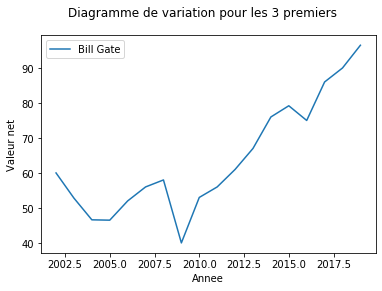

In [20]:
plt.plot(bill0['year'], bill0['net_worth'], label='Bill Gate')
plt.ylabel('Valeur net')
plt.xlabel('Annee')
plt.legend()
plt.suptitle("Diagramme de variation pour les 3 premiers")

In [21]:
bill0.tail(12)

,year,rank,name,net_worth,age,natinality,source_wealth
11,2008,3,Bill Gates,58.0,52,United States,Microsoft
10,2009,1,Bill Gates,40.0,53,United States,Microsoft
9,2010,2,Bill Gates,53.0,54,United States,Microsoft
8,2011,2,Bill Gates,56.0,55,United States,Microsoft
7,2012,2,Bill Gates,61.0,56,United States,Microsoft
6,2013,2,Bill Gates,67.0,57,United States,Microsoft
5,2014,1,Bill Gates,76.0,58,United States,Microsoft
4,2015,1,Bill Gates,79.2,59,United States,Microsoft
3,2016,1,Bill Gates,75.0,60,United States,Microsoft
2,2017,1,Bill Gates,86.0,61,United States,Microsoft


# Merci de votre attention

# Maintenant c'est votre tour